## Project: Communicate Data Findings (Bay Wheels System)

In this part of project as a first part, my goal is shown to carry out an exploratory data analysis on Ford GoBike Trip dataset. I will use Python data science and data visualization libraries to explore Ford GoBike dataset’s variables and perceive the data’s structure,patterns and lastly relationships. The analysis is not only covered from univariate exploration to multivariate exploration, but it also is included the process of gathering,assessing and cleaning data. This part of the project gives opportunity to analysis the exploration of data.

## Table of Contents
- [Introduction](#intro)
- [Part I - Gathering Data](#gathering)
- [Part II - Assessing Data](#assessing)
- [Part III - Cleaning Data](#cleaning)
- [Part IV - Univariate Exploration](#univariate_exploration)
- [Part V - Bivariate Exploration](#bivariate_exploration)
- [Part VI - Multivariate Exploration](#multivariate_exploration)
- [Part VII - Conclusion](#conclusion)

<a id='intro'></a>
### Introduction

Ford GoBike is a regional public bicycle sharing system in the San Francisco Bay Area, California. Beginning operation in August 2013 as Bay Area Bike Share, the Ford GoBike system currently has over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. On June 28, 2017, the system officially launched as Ford GoBike in a partnership with Ford Motor Company. On June 11, 2019, the system rebranded to Bay Wheels and dropped the Ford naming. Along with the rebranding, Bay Wheels also deployed a new generation of bicycles which can use bikeshare docks and dockless mode, in which customers can lock the bike to a bicycle rack with a built-in lock.

Bay Wheels, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.

Resource : https://en.wikipedia.org/wiki/Bay_Wheels

<a id='gathering'></a>
### Part I - Gathering Data

The Bay Wheels whose previous name is Ford GoBike Trip dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay & nearby areas. Each trip is anonymized and includes:

- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
- Member Year of Birth
- Member Gender

1- Importing all packages and set plots to be embedded inline

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar
import zipfile

2- Gathering the Bay Wheels Trip Data whose filename is 202001-baywheels-tripdata.csv from 202001-baywheels-tripdata.csv.zip file

In [2]:
zf = zipfile.ZipFile('202001-baywheels-tripdata.csv.zip')
bay_wheels_df = pd.read_csv(zf.open('202001-baywheels-tripdata.csv'), low_memory=False)

<a id='assessing'></a>
### Part II - Assessing Data

In ths part, I determine whether bay wheel dataset is convenient or not by defining quality issues and tidiness issues.

Here are the features of both quality issues and tidiness issues shown below.

The four features of quality issues:

1. Completeness: Does a dataset have missing data?
2. Validity: Does a dataset make sense?
3. Accuracy: Does a dataset contain inaccurate data?
4. Consistency: Does the data of each row has standardization?

Three features for tidiness:

1. Each variable is defined only just in one column
2. Duplicate rows cannot be contained in dataset.
3. If dataset is combined with another one, the column of both all dataset applying join process should be same type.  

#### bay_wheels_df

<ul>
<li> <i>duration_sec:</i> the time of duration as second  </li>
    
<li> <i>start_time:</i> the start time of duration</li>
    
<li> <i>end_time:</i> the end time of duration</li>
    
<li> <i>start_station_id:</i> the unique identifier of start station</li>
    
<li> <i>start_station_name:</i> the name of start station</li>

<li> <i>start_station_latitude:</i> the latitude of start station's location</li>

<li> <i>start_station_longitude:</i> the longitude of start station's location</li>

<li> <i>end_station_id:</i> the unique identifier of end station</li>

<li> <i>end_station_name :</i> the name of end station</li>

<li> <i>end_station_latitude :</i> the latitude of end station's location</li>

<li> <i>end_station_longitude:</i> the longitude of end station's location</li>

<li> <i>bike_id:</i> the unique identifier of bikes</li>

<li> <i>user_type:</i> The type of user rent a bikes (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)</li>

<li> <i>bike_share_for_all_trip:</i> The type of sharing bike for all trip as 'Yes' or 'No'</li>

<li> <i>rental_access_method:</i> The rental access method applied for users as 'app' or 'clipper'</li>

<ul>

In [3]:
# Show first 5 data of bay_wheels_df dataframe
bay_wheels_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,83118,2020-01-31 15:23:47.7330,2020-02-01 14:29:06.2630,400.0,Buchanan St at North Point St,37.804272,-122.433537,400.0,Buchanan St at North Point St,37.804272,-122.433537,13052,Customer,No,NaN
1,68239,2020-01-31 15:40:31.6160,2020-02-01 10:37:51.0000,99.0,Folsom St at 15th St,37.767037,-122.415443,99.0,Folsom St at 15th St,37.767037,-122.415443,12235,Subscriber,Yes,NaN
2,55407,2020-01-31 17:48:16.6350,2020-02-01 09:11:44.3170,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,12822,Customer,No,NaN
3,54929,2020-01-31 17:53:03.4130,2020-02-01 09:08:32.6340,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,11705,Customer,No,NaN
4,55700,2020-01-31 17:12:33.4600,2020-02-01 08:40:53.6460,12.0,Pier 1/2 at The Embarcadero,37.796389,-122.394586,371.0,Lombard St at Columbus Ave,37.802746,-122.413579,3673,Customer,No,NaN


In [4]:
# Show last 5 data of bay_wheels_df dataframe
bay_wheels_df.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
295849,890,2020-01-26 16:18:12,2020-01-26 16:33:02,NaN,NaN,37.810492,-122.476752,NaN,NaN,37.786677,-122.466642,353366,Customer,NaN,app
295850,1328,2020-01-06 12:40:12,2020-01-06 13:02:20,NaN,NaN,37.810496,-122.476856,NaN,NaN,37.780677,-122.475797,301867,Subscriber,NaN,app
295851,12530,2020-01-09 13:56:54,2020-01-09 17:25:44,NaN,NaN,37.810550,-122.476451,468.0,Grove St at Gough St,37.777870,-122.422953,380070,Subscriber,NaN,app
295852,1735,2020-01-30 23:08:59,2020-01-30 23:37:54,NaN,NaN,37.810575,-122.410644,NaN,NaN,37.786252,-122.409532,219934,Subscriber,NaN,app
295853,6477,2020-01-04 15:11:49,2020-01-04 16:59:47,NaN,NaN,37.811147,-122.410889,NaN,NaN,37.797196,-122.434999,282535,Customer,NaN,app


In [5]:
bay_wheels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295854 entries, 0 to 295853
Data columns (total 15 columns):
duration_sec               295854 non-null int64
start_time                 295854 non-null object
end_time                   295854 non-null object
start_station_id           146286 non-null float64
start_station_name         146866 non-null object
start_station_latitude     295854 non-null float64
start_station_longitude    295854 non-null float64
end_station_id             145934 non-null float64
end_station_name           146511 non-null object
end_station_latitude       295854 non-null float64
end_station_longitude      295854 non-null float64
bike_id                    295854 non-null int64
user_type                  295854 non-null object
bike_share_for_all_trip    110108 non-null object
rental_access_method       185746 non-null object
dtypes: float64(6), int64(2), object(7)
memory usage: 33.9+ MB


In [6]:
# Show how many variables there are in bay_wheels_df dataframe
bay_wheels_df.count()

duration_sec               295854
start_time                 295854
end_time                   295854
start_station_id           146286
start_station_name         146866
start_station_latitude     295854
start_station_longitude    295854
end_station_id             145934
end_station_name           146511
end_station_latitude       295854
end_station_longitude      295854
bike_id                    295854
user_type                  295854
bike_share_for_all_trip    110108
rental_access_method       185746
dtype: int64

In [7]:
# Show descriptive statistics of bay_wheels_df dataframe
bay_wheels_df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,295854.000000,146286.000000,295854.000000,295854.000000,145934.000000,295854.000000,295854.000000,295854.00000
mean,780.473193,168.900879,37.751277,-122.357866,161.061788,37.751261,-122.356994,321533.84539
std,2037.786317,141.956388,0.228337,0.650796,140.766154,0.238642,0.688512,307015.31534
min,60.000000,3.000000,0.000000,-122.513871,3.000000,0.000000,-122.513847,12.00000
25%,369.000000,53.000000,37.766214,-122.419481,43.000000,37.766376,-122.418306,11328.00000
50%,588.000000,120.000000,37.777158,-122.403234,113.000000,37.777370,-122.402717,279974.00000
75%,912.000000,263.000000,37.790102,-122.392450,250.000000,37.790492,-122.392546,545607.00000
max,811077.000000,506.000000,37.880222,0.000000,506.000000,37.927622,0.000000,999952.00000


In [8]:
# Show Null values of each column in bay_wheels_df dataframe
bay_wheels_df.isnull().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id           149568
start_station_name         148988
start_station_latitude          0
start_station_longitude         0
end_station_id             149920
end_station_name           149343
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
bike_share_for_all_trip    185746
rental_access_method       110108
dtype: int64

In [9]:
# Check whether duplicated values exist or not in bay_wheels_df dataframe
bay_wheels_df.duplicated().sum()

0

In [10]:
# Show the number of bike_share_for_all_trip with counts of each data value in bay_wheels_df dataframe
bay_wheels_df["bike_share_for_all_trip"].value_counts()

No     108415
Yes      1693
Name: bike_share_for_all_trip, dtype: int64

In [11]:
# Show the number of rental_access_method with counts of each data value in bay_wheels_df dataframe
bay_wheels_df["rental_access_method"].value_counts()

app        171751
clipper     13995
Name: rental_access_method, dtype: int64

##### Quality Issues
<ul>
<li>
    <b>Completeness:</b>
    <ul>
        <li>missing data in the following columns: start_station_id, start_station_name, end_station_id, end_station_name, bike_share_for_all_trip, rental_access_method</li>
        <li>All bike_id should be int type so there is no problem here</li>
    </ul>        
</li>
<li>
    <b>Validity:</b>
    <ul>
        <li>No Validity Problem</li>
    </ul>    
</li>    
<li>
    <b>Accuracy:</b>
    <ul>
        <li>Stripping time from the start_time and end_time column as timestamps</li>
        <li>user_type and bike_share_for_all_trip can be set to category </li>
        <li>start_station_id and end_station_id can be set to string type </li>
    </ul>    
</li>           
<li>
    <b>Consistency:</b>
    <ul>
        <li>Generate minutes for trip duration from duration_sec </li>
        <li>Calculate the distance for rides between start station and end station </li>
    </ul>    
</li>    

</ul>    


##### Tideness Issues

<ul>
    <li>
       Converting from start time and end time as object type to timestamps 
    </li>
    <li>
       user_type and bike_share_for_all_trip can be set to category
    </li>
    <li>
       start_station_id and end_station_id can be set to string type
    </li>
    <li>
       Generating minutes for trip duration from duration_sec
    </li>
    <li>
       Calculating the distance for rides between start station and end station
    </li>
    <li>
       Removing all null or NaN values from dataframe
    </li>
</ul>    

<a id='cleaning'></a>
### Part III - Cleaning Data

In this part, the process consists of the cleaning portion of the data wrangling process shown below as itemizing each one:

1. Define: convert our assessments into defined cleaning tasks. These definitions also serve as an instruction list so others (or yourself in the future) can look at your work and reproduce it.

2. Code: convert those definitions to code and run that code.

3. Test: test your dataset, visually or with code, to make sure your cleaning operations worked.


##### Define

<ul>
    <li>
       Converting from start time and end time as object type to timestamps 
    </li>
    <li>
       user_type and bike_share_for_all_trip can be set to category
    </li>
    <li>
       start_station_id and end_station_id can be set to int type
    </li>
    <li>
       Generating minutes for trip duration from duration_sec
    </li>
    <li>
       Calculating the distance for rides between start station and end station
    </li>
    <li>
       Removing all null or NaN values from dataframe
    </li>
</ul>    

In [12]:
# Create copies of original DataFrames
bay_wheels_df_clean = bay_wheels_df.copy()

1- Converting from start time and end time as object type to timestamps

In [13]:
# Converting from start time and end time as object type to timestamps
bay_wheels_df_clean['start_time'] = pd.to_datetime(bay_wheels_df_clean['start_time'])
bay_wheels_df_clean['end_time'] = pd.to_datetime(bay_wheels_df_clean['end_time'])

In [14]:
# Getting hour values from start time and end time
bay_wheels_df_clean['start_time_hour'] = bay_wheels_df_clean['start_time'].dt.hour
bay_wheels_df_clean['end_time_hour'] = bay_wheels_df_clean['end_time'].dt.hour

# Getting weekday values from start time
bay_wheels_df_clean['start_time_weekday_abbr'] = bay_wheels_df_clean['start_time'].dt.weekday.apply(lambda x: calendar.day_abbr[x])

# Getting from year-month-day from start time and end time
bay_wheels_df_clean['start_time'] = bay_wheels_df_clean['start_time'].map(lambda x: x.strftime('%Y-%m-%d'))
bay_wheels_df_clean['end_time'] = bay_wheels_df_clean['end_time'].map(lambda x: x.strftime('%Y-%m-%d'))

In [15]:
bay_wheels_df_clean.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method,start_time_hour,end_time_hour,start_time_weekday_abbr
232541,1000,2020-01-15,2020-01-15,285.0,Webster St at O'Farrell St,37.783521,-122.431158,NaN,NaN,37.776855,-122.395025,187502,Subscriber,NaN,app,8,8,Wed
89077,337,2020-01-07,2020-01-07,104.0,4th St at 16th St,37.767045,-122.390833,81.0,Berry St at 4th St,37.775880,-122.393170,2064,Customer,No,NaN,15,16,Tue
84893,210,2020-01-08,2020-01-08,75.0,Market St at Franklin St,37.773793,-122.421239,383.0,Golden Gate Ave at Franklin St,37.780787,-122.421934,10348,Customer,No,NaN,9,9,Wed
247419,566,2020-01-27,2020-01-27,26.0,1st St at Folsom St,37.787290,-122.394380,NaN,NaN,37.771322,-122.407687,489167,Subscriber,NaN,app,16,16,Mon
38359,166,2020-01-21,2020-01-21,133.0,Valencia St at 22nd St,37.755213,-122.420975,109.0,17th St at Valencia St,37.763316,-122.421904,11922,Customer,No,NaN,12,12,Tue
243462,401,2020-01-10,2020-01-10,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,81.0,Berry St at 4th St,37.775880,-122.393170,526382,Subscriber,NaN,app,9,9,Fri
205269,910,2020-01-24,2020-01-24,58.0,Market St at 10th St,37.776619,-122.417385,480.0,Steiner St at California St,37.788569,-122.435401,652010,Subscriber,NaN,app,16,16,Fri
250473,1103,2020-01-05,2020-01-05,NaN,NaN,37.787973,-122.442139,NaN,NaN,37.764105,-122.466859,437175,Subscriber,NaN,app,18,18,Sun
128674,315,2020-01-31,2020-01-31,NaN,NaN,37.724267,-122.450671,NaN,NaN,37.722121,-122.447493,321778,Subscriber,NaN,app,14,14,Fri
218897,636,2020-01-30,2020-01-30,NaN,NaN,37.779064,-122.396800,NaN,NaN,37.769053,-122.426386,253672,Subscriber,NaN,app,22,23,Thu


2- user_type and bike_share_for_all_trip can be set to category and start_station_id and end_station_id can be set to int type

In [16]:
# user_type and bike_share_for_all_trip can be set to category
bay_wheels_df_clean['user_type'] = bay_wheels_df_clean['user_type'].astype('category')
bay_wheels_df_clean.bike_share_for_all_trip = bay_wheels_df_clean.bike_share_for_all_trip.astype('category')

In [17]:
# start_station_id and end_station_id can be set to string type
bay_wheels_df_clean['start_station_id'] = bay_wheels_df_clean['start_station_id'].astype(str)
bay_wheels_df_clean.end_station_id = bay_wheels_df_clean.end_station_id.astype(str)

3- Generating minutes for trip duration from duration_sec

In [18]:
# Generating minutes for trip duration from duration_sec
bay_wheels_df_clean['duration_min'] = bay_wheels_df_clean['duration_sec']/60

4- Calculating the distance for rides between start station and end station

In [19]:
"""
    The function calculating the distance between two geo location point.

    Arguments:
        start_station_latitude: the latitude of first geo location point
        start_station_longitude: the longitude of first geo location point
        end_station_latitude: the latitude of second geo location point
        end_station_longitude: the longitude of second geo location point
    Returns:
        distance_in_km : float
    """
from math import sin, cos, sqrt, atan2, radians
def calculate_distance(start_station_latitude, start_station_longitude, end_station_latitude, end_station_longitude):
    R = 6373.0 # #radians of the earth (km)

    lat1 = radians(start_station_latitude)
    lon1 = radians(start_station_longitude)
    lat2 = radians(end_station_latitude)
    lon2 = radians(end_station_longitude)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance_in_km = R * c
    return distance_in_km


In [20]:
# apply above function for distance calculation
bay_wheels_df_clean['distance_km'] = bay_wheels_df_clean.apply(lambda x: calculate_distance(
                                              x['start_station_latitude'], x['start_station_longitude'],
                                              x['end_station_latitude'], x['end_station_longitude']
                                             ), axis=1)

5- After the cleaning process has done, checking if the dataframe is convenient

In [21]:
# check if the dataframe is convenient after the cleaning process has done
bay_wheels_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295854 entries, 0 to 295853
Data columns (total 20 columns):
duration_sec               295854 non-null int64
start_time                 295854 non-null object
end_time                   295854 non-null object
start_station_id           295854 non-null object
start_station_name         146866 non-null object
start_station_latitude     295854 non-null float64
start_station_longitude    295854 non-null float64
end_station_id             295854 non-null object
end_station_name           146511 non-null object
end_station_latitude       295854 non-null float64
end_station_longitude      295854 non-null float64
bike_id                    295854 non-null int64
user_type                  295854 non-null category
bike_share_for_all_trip    110108 non-null category
rental_access_method       185746 non-null object
start_time_hour            295854 non-null int64
end_time_hour              295854 non-null int64
start_time_weekday_abbr    295854 n

6- Saving the clean dataframe to csv file

In [22]:
# Save the clean dataframe to csv file
#bay_wheels_df_clean.to_csv('bay_wheels_main.csv', encoding='utf-8', index=False)

bay_wheels_df_clean.to_csv('bay_wheels_main.csv.gz', compression='gzip', encoding='utf-8', index=False)

<a id='univariate_exploration'></a>
### Part IV - Univariate Exploration

In this part, there are 6 visualizations to analysis dataset in terms of only just one variables. All these figures are defined as below.

1- What is the usage of bay wheels system in January 2020?

2- What is the distribution of trip time duration for bay wheels system in January 2020?

3- What is the number of the user type for bay wheels system in January 2020?

4- What is the distribution of distance in km for bay wheels system in January 2020?

5- Which the top 5 start stations are mostly used for the users of bay wheels system in January 2020?

6- Which the top 5 end stations are mostly used for the users of bay wheels system in January 2020?

In [23]:
# load in the dataset into a pandas dataframe
# bay_wheels_main_df = pd.read_csv('bay_wheels_main.csv', low_memory=False)
bay_wheels_main_df = pd.read_csv('bay_wheels_main.csv.gz', compression='gzip', low_memory=False)

### Visualization 1 : What is the usage of bay wheels system in January 2020?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

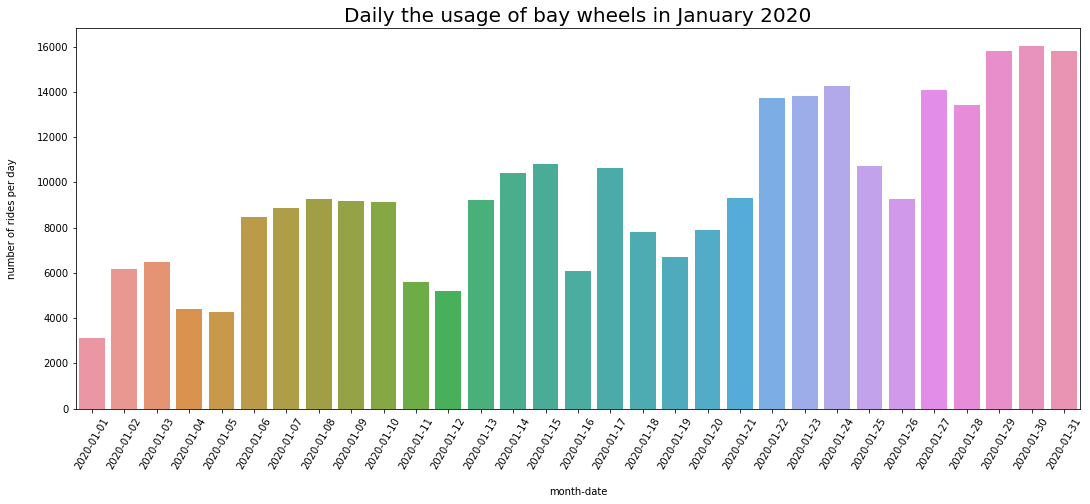

In [24]:
plt.figure(figsize=(18,7))
sns.countplot(x='start_time', data = bay_wheels_main_df.sort_values(by='start_time'))
plt.title('Daily the usage of bay wheels in January 2020', fontsize=20, y=1)
plt.xlabel('month-date', labelpad=16)
plt.ylabel('number of rides per day', labelpad=20)
plt.xticks(rotation=60)

The result of the visualization 1: 

- The figure is shown the number of bike rides in each day of January 2020 consecutively.
- The last three days of Janurary as 28th,29th and lastly 30th are shown the most usage of bay wheels. 

### Visualization 2 : What is the distribution of trip time duration for bay wheels system in January 2020?

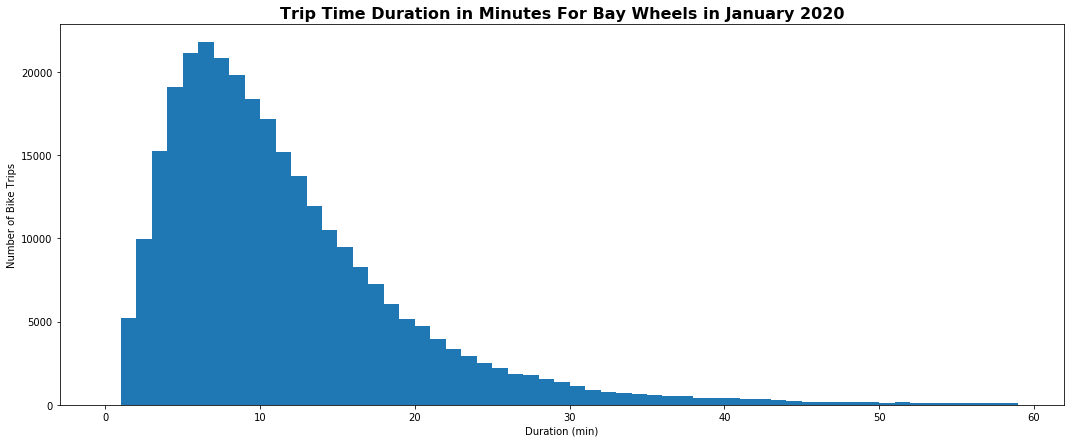

In [39]:
plt.figure(figsize=(18,7))
bin_edges_a = np.arange(0,60,1)
plt.hist(data = bay_wheels_main_df, x = 'duration_min', bins = bin_edges_a);
plt.title("Trip Time Duration in Minutes For Bay Wheels in January 2020", y=1, fontsize=16, fontweight='bold')
plt.xlabel('Duration (min)')
plt.ylabel('Number of Bike Trips');

The result of the visualization 2:

- The figure is shown the number of the bike trips in terms of the trip duration from start point to the destination in January 2020.

- The trip duration in minutes for all number of bike bikes is ranged from 0 - 60 minutes.

- While most people use the bay wheel system to ride a bike in approximately 0 - 10 minutes, not too much people have been riding a bike for more than 10 minutes.

- The figure is right-skewed graph because most variable are located left-hand side.

### Visualization 3 : What is the number of the user type for bay wheels system in January 2020?

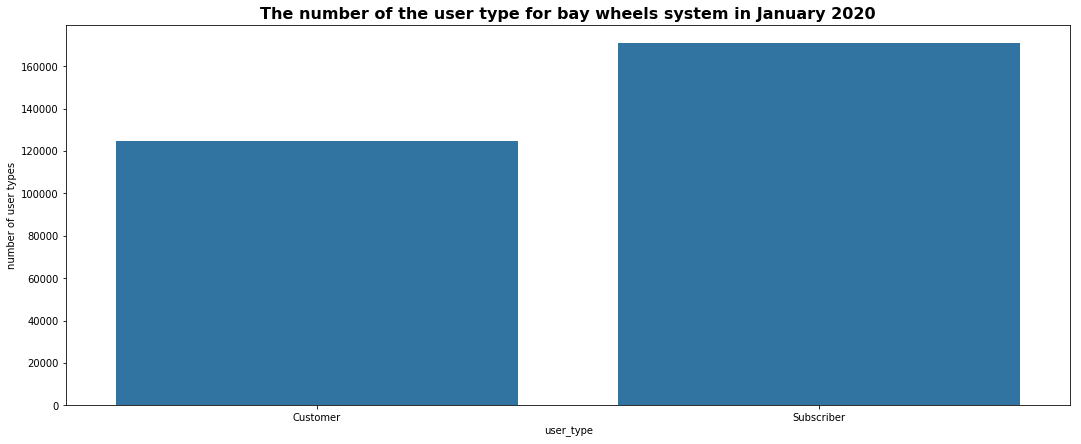

In [40]:
plt.figure(figsize=(18,7))
base_color = sns.color_palette()[0]
sns.countplot(data = bay_wheels_main_df, x = 'user_type', color = base_color)
plt.title("The number of the user type for bay wheels system in January 2020", y=1, fontsize=16, fontweight='bold')
plt.ylabel('number of user types');

The result of the visualization 3: 

- The user type of the usage of bay wheels is called as Customer and Subcriber.

- While the number of subcribers are extended from 16000, Customer are consisted of just above 12000.

- Subcribers are more effective to use the bay wheel system rather than customers.

### Visualization 4 : What is the distribution of distance in km for bay wheels system in January 2020?

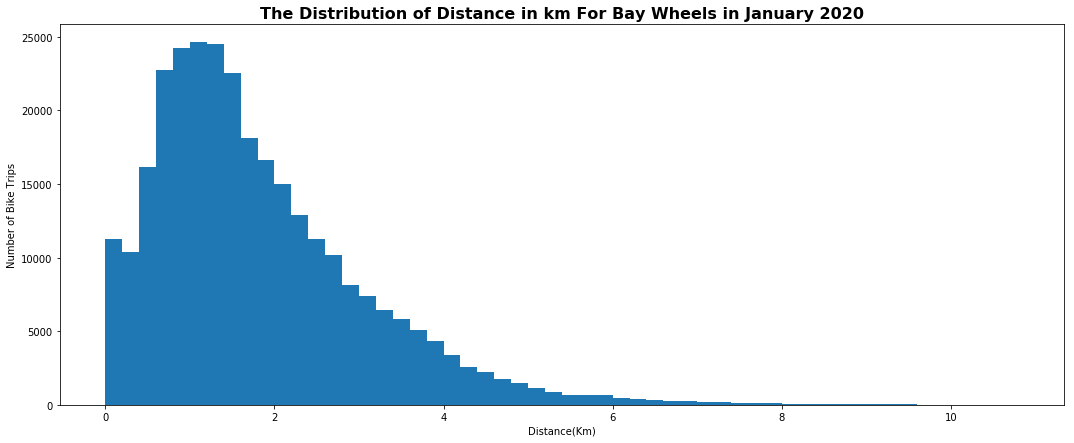

In [41]:
plt.figure(figsize=(18,7))
bin_edges_a = np.arange(0,11,0.2)
plt.hist(data = bay_wheels_main_df, x = 'distance_km', bins = bin_edges_a);
plt.title("The Distribution of Distance in km For Bay Wheels in January 2020", y=1, fontsize=16, fontweight='bold')
plt.xlabel('Distance(Km)')
plt.ylabel('Number of Bike Trips');

The result of the visualization 4: 

- The figure is shown the number of the bike trips in terms of the distance in km from start point to the destination in January 2020.

- The distance in km for all number of bike bikes is ranged from 0 - 10 km.

- While most people use the bay wheel system to ride a bike in approximately 0 - 2 km, not too much people have been riding a bike for more than 2 km.

- The figure is right-skewed graph because most variable are located left-hand side.

### Visualization 5 : Which the top 5 start stations are mostly used for the users of bay wheels system in January 2020?

Text(0.5, 1.0, 'Top 5 start stations where most users starts to ride a bike for bay wheels system in January 2020')

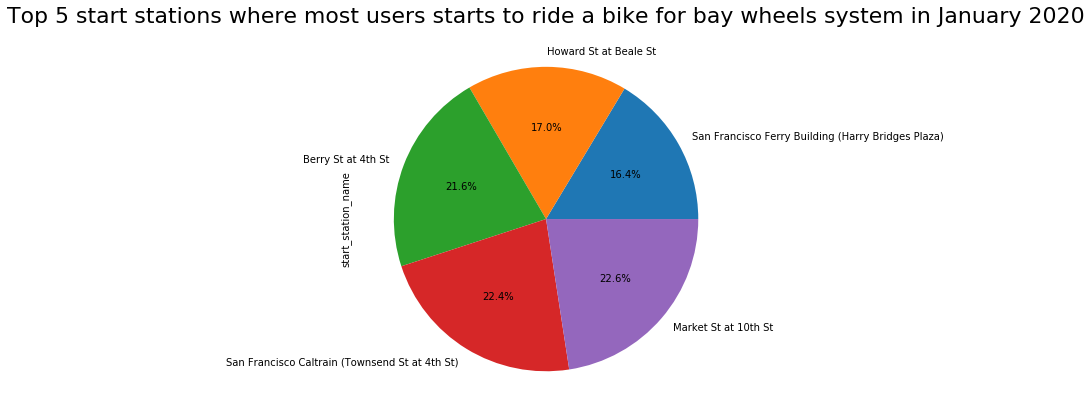

In [28]:
plt.figure(figsize=(18,7))
start_stn = bay_wheels_main_df["start_station_name"].value_counts().nlargest(5)

start_stn.sort_values(ascending=True).plot(kind='pie', autopct='%1.1f%%')
plt.title("Top 5 start stations where most users starts to ride a bike for bay wheels system in January 2020",fontsize=22)

The result of the visualization 5: 

- The figure is the shown the most usage of bay wheels system in 5 top starting points.

- Most people prefer to ride a bike from Market St at 10th St as the most-preferable starting point.


### Visualization 6 : Which the top 5 end stations are mostly used for the users of bay wheels system in January 2020?

Text(0.5, 1.0, 'Top 5 start stations where most users ends to ride a bike for bay wheels system in January 2020')

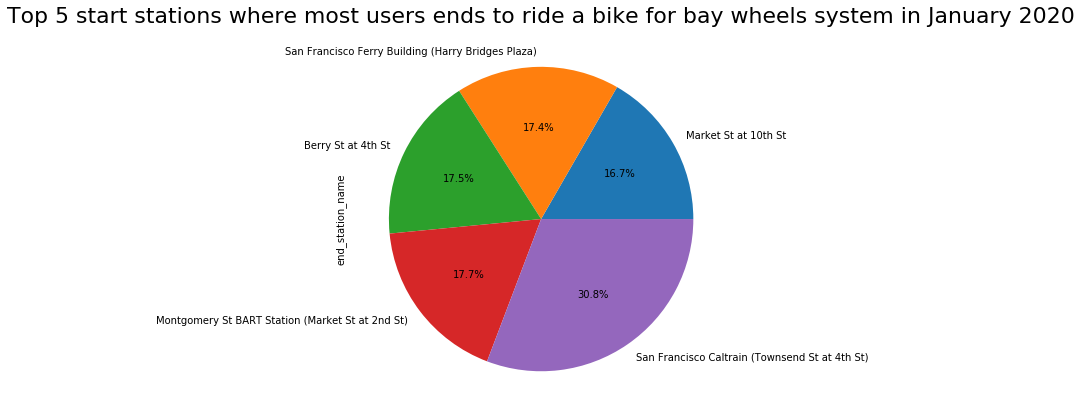

In [29]:
plt.figure(figsize=(18,7))
start_stn = bay_wheels_main_df["end_station_name"].value_counts().nlargest(5)

start_stn.sort_values(ascending=True).plot(kind='pie', autopct='%1.1f%%')
plt.title("Top 5 start stations where most users ends to ride a bike for bay wheels system in January 2020",fontsize=22)

The result of the visualization 6: 

- The figure is the shown the most usage of bay wheels system in 5 end starting points.

- Most people would rather end to ride a bike at San Francisco Caltrain(Townsend St at 4th St) as a most-preferable ending point.


<a id='bivariate_exploration'></a>
### Part V - Bivariate Exploration

In this part, there are 4 visualizations to analysis dataset in terms of only just two variables. All these figures are defined as below.

1- What is the usage of bay wheels system in terms of user type in January 2020?

2- What is the distribution of trip time duration for bay wheels system in terms of user type in January 2020?

3- What is the distribution of distance in km for bay wheels system in terms of user type in January 2020?

4- What is the distribution of the weekday usage of bay wheels system in terms of user type in January 2020?


### Visualization 1 : What is the usage of bay wheels system in terms of user type in January 2020?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

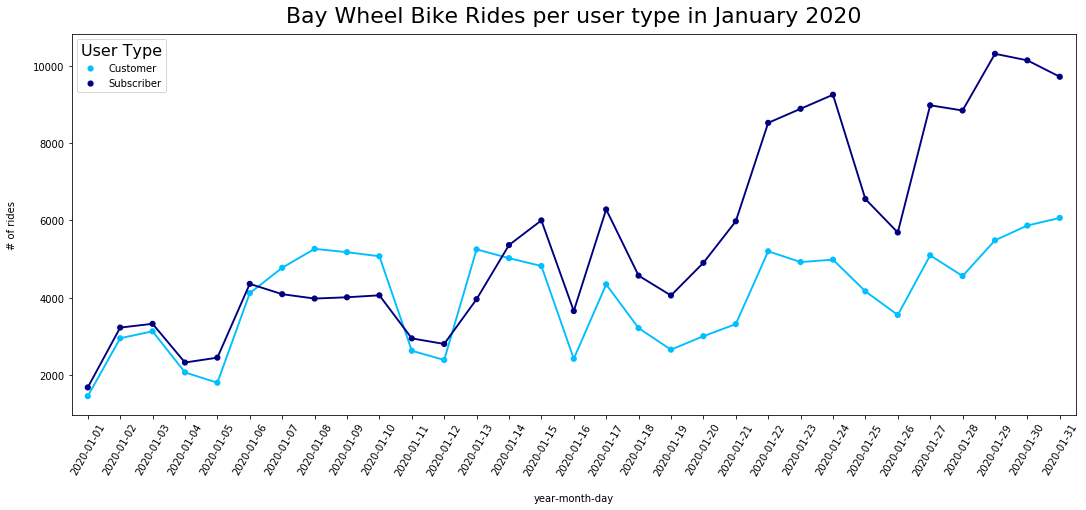

In [30]:
plt.figure(figsize=(18,7))

bay_wheels_user_type_count_df = bay_wheels_main_df.groupby(["start_time", "user_type"]).size().reset_index()

my_palette = {'Subscriber':'navy', 'Customer':'deepskyblue'}
ax = sns.pointplot(x='start_time', y=0, hue='user_type', palette=my_palette, scale=.7, data = bay_wheels_user_type_count_df)
plt.title('Bay Wheel Bike Rides per user type in January 2020', fontsize=22, y=1.015)
plt.xlabel('year-month-day', labelpad=16)
plt.ylabel('# of rides', labelpad=16)
leg = ax.legend()
leg.set_title('User Type',prop={'size':16})
ax = plt.gca()
plt.xticks(rotation=60)

The result of visualization 1:

- The figure is shown the the distribution of number of bike rides in each day of January 2020 consecutively in terms of the user type as Customer and Subcriber.

- While the number of customers exceeds the number of subscribers for the usage of riding a bike in some days of January, vice-versa in other days of January. However, when looking the general trend of the number of rides per user type , the number of subcribers are more than the number of customers.

### Visulization 2 : What is the distribution of trip time duration for bay wheels system in terms of user type in January 2020?

<Figure size 1296x504 with 0 Axes>

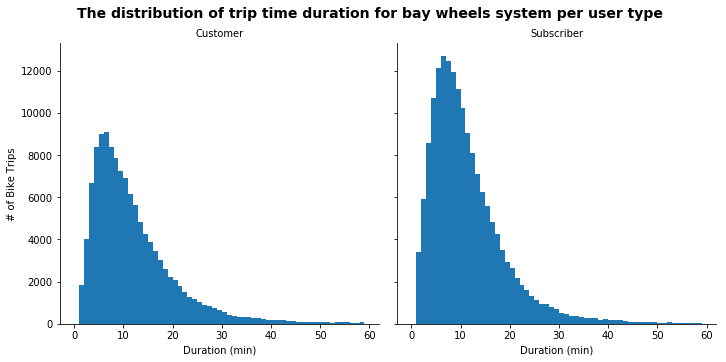

In [31]:
plt.figure(figsize=(18,7))
g = sns.FacetGrid(bay_wheels_main_df, col="user_type", margin_titles=True, height=5)
bin_edges = np.arange(0,60,1)
base_color = sns.color_palette()[0]
g.map(plt.hist, "duration_min", color=base_color, bins=bin_edges)
g.set_axis_labels("Duration (min)", "# of Bike Trips")
plt.subplots_adjust(top=0.9)
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('The distribution of trip time duration for bay wheels system per user type', y=1, fontsize=14, fontweight='semibold');

The result of visualization 2:

- All these two figures are shown the the distribution of trip time durations for bay wheels system in each day of January 2020 consecutively in terms of the user type as Customer and Subcriber.

- The trip duration in minutes of both customer and subcribers for bay wheels system are ranged from 0 - 60 minutes.

- According to both customer and subcriber, while most people use the bay wheel system to ride a bike in approximately 0 - 10 minutes, not too much people have been riding a bike for more than 10 minutes.

- When looking the number of bike trips for bay wheels system in both figures, the number of bike trips for bay wheels system in Customer is less than Subscriber's numbers.   

- All thes two figures are right-skewed graph because most variable of each figure are located left-hand side.

### Visulization 3 : What is the distribution of distance in km for bay wheels system in terms of user type in January 2020?

<Figure size 1296x504 with 0 Axes>

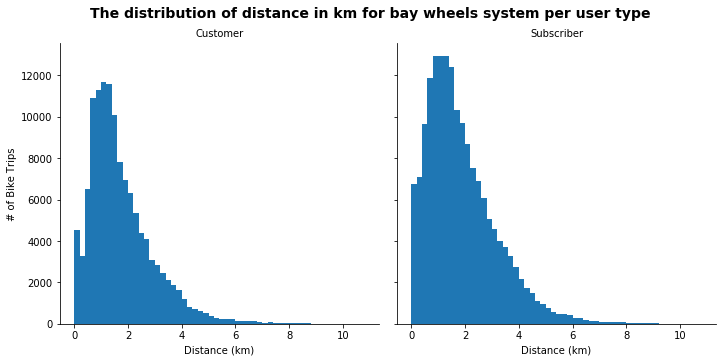

In [32]:
plt.figure(figsize=(18,7))
g = sns.FacetGrid(bay_wheels_main_df, col="user_type", margin_titles=True, height=5)
bin_edges = np.arange(0,11,0.2)
base_color = sns.color_palette()[0]
g.map(plt.hist, "distance_km", color=base_color, bins=bin_edges)
g.set_axis_labels("Distance (km)", "# of Bike Trips")
plt.subplots_adjust(top=0.9)
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('The distribution of distance in km for bay wheels system per user type', y=1, fontsize=14, fontweight='semibold');

The result of visualization 3:

- All these two figures are shown the the distribution of distance in km for bay wheels system in each day of January 2020 consecutively in terms of the user type as Customer and Subcriber.

- The distance in km of both customer and subcribers for bay wheels system are ranged from 0 - 10 km.

- According to both customer and subcriber, while most people use the bay wheel system to ride a bike in approximately 0 - 2 km, not too much people have been riding a bike for more than 2 km.

- When looking the number of bike trips for bay wheels system in both figures, the number of bike trips for bay wheels system in Customer is little less than Subscriber's numbers.   

- All thes two figures are right-skewed graph because most variable of each figure are located left-hand side.

### Visulization 4 : What is the distribution of the weekday usage of bay wheels system in terms of user type in January 2020?

<Figure size 1296x504 with 0 Axes>

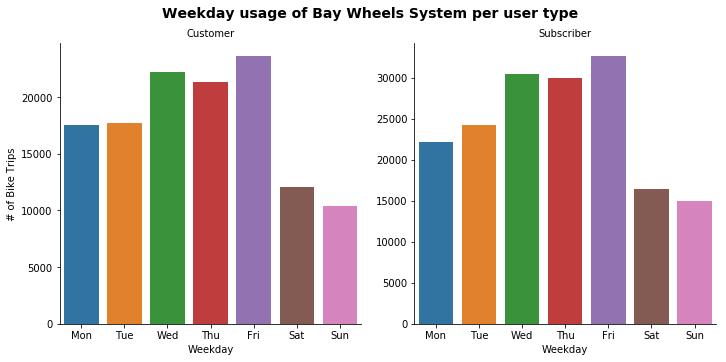

In [33]:
# weekday usege of the bike sharing system per user type
plt.figure(figsize=(18,7))
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sns.catplot(data=bay_wheels_main_df, x='start_time_weekday_abbr', col="user_type", kind='count', sharey = False,
                order = weekday)
g.set_axis_labels("Weekday", "# of Bike Trips")
plt.subplots_adjust(top=0.9)
g.set_titles("{col_name}")
g.fig.suptitle('Weekday usage of Bay Wheels System per user type', y=1, fontsize=14, fontweight='semibold');

The result of visualization 4:

- All these two figures are shown the distribution of the weekday usage of bay wheels system in terms of user type in January 2020.

- The figure of Customer's weekday usage of Bay Wheels System is affinity with Subcriber's ones except for the number of bike trips. The number of bike trips for Subcriber's weekday usage of Bay Wheels System is more than Customer's one.


<a id='multivariate_exploration'></a>
### Part VI - Multivariate Exploration

In this part, there is only visualizations to analysis dataset in terms of moe than two variables. This figure is defined as below.

1- What is the hourly usage of bay wheels system during week in terms of user type in January 2020?

### Visulization 1 : What is the hourly usage of bay wheels system during week in terms of user type in January 2020?

Text(0.5, 0.98, 'The Hourly Usage of Bay Wheels System During Week')

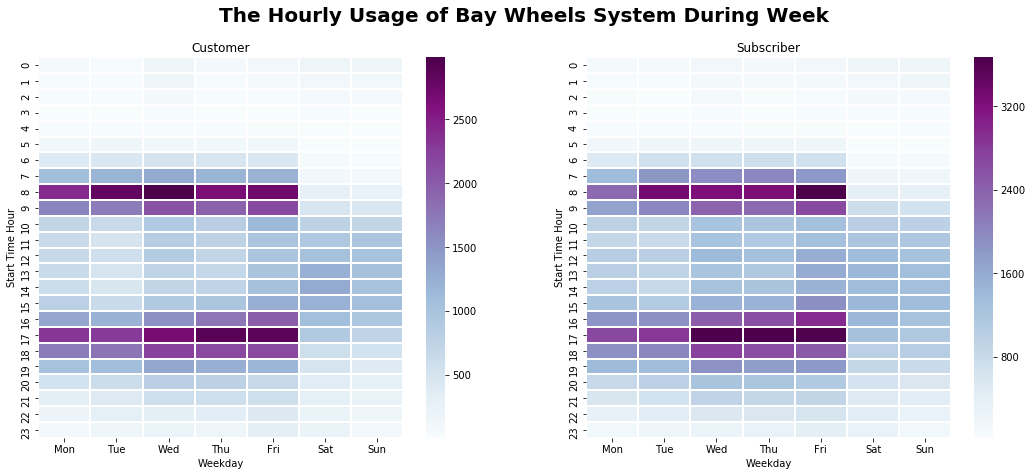

In [42]:
plt.figure(figsize=(18,7))

# Setting the weekday consecutively
bay_wheels_main_df['start_time_weekday_abbr'] = pd.Categorical(bay_wheels_main_df['start_time_weekday_abbr'], 
                                                categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                                ordered=True)

# heatmap for customers
plt.subplot(1, 2, 1)
df_customer = bay_wheels_main_df.query('user_type == "Customer"').groupby(["start_time_hour", "start_time_weekday_abbr"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot("start_time_hour", "start_time_weekday_abbr", "bike_id")
sns.heatmap(df_customer, cmap="BuPu", linewidths=1 )

plt.title("Customer", y=1)
plt.xlabel('Weekday')
plt.ylabel('Start Time Hour')

# heatmap for subscribers
plt.subplot(1, 2, 2)
df_subscriber = bay_wheels_main_df.query('user_type == "Subscriber"').groupby(["start_time_hour", "start_time_weekday_abbr"])["bike_id"].size().reset_index()
df_subscriber = df_subscriber.pivot("start_time_hour", "start_time_weekday_abbr", "bike_id")
sns.heatmap(df_subscriber, cmap="BuPu", linewidths=1)

plt.title("Subscriber", y = 1)
plt.xlabel('Weekday')
plt.ylabel('Start Time Hour');

plt.suptitle('The Hourly Usage of Bay Wheels System During Week', fontsize=20, fontweight="semibold")


The result of visualization 1:

- All these figures are shown the hourly usage of bay wheels system during week in terms of user type in January 2020.

- The figure of Customer's hourly usage of Bay Wheels System is little affinity with Subcriber's ones except for the number of bike trips. The number of bike trips for Subcriber's hourly usage of Bay Wheels System is more than Customer's one.

- For both the figures of Customer and Subcriber, 8pm, 9pm, 16am, 17am and lasty 18am of all weekdays are the most effective time schedule for the usage of bay wheel system.  

<a id='conclusion'></a>
### Part VII - Conclusion